<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Спасибо, что сдал задание:) Ты проделал большую работу. Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выпфолнения проекта. 

</div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [5]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Видно что в таблице очень много пропусков, необзодимо более детальное изучение чтоб понять происхождение.
Так же должно быть три булевых типа а их два, третий спрятался за типом object нужно будет разобраться с ним.
так же достаточно присутсвует вещественных типов данных, необходимо от них избавиться и привести всё что можно к целочисленному.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Отличное начало, радует, что основательно подходишь к анализу с самого начала работы

### Шаг 2. Предобработка данных

In [6]:
def fix_cel(et):
    return data[data['floors_total'] == et]['ceiling_height'].median()
data.loc[data['ceiling_height'].isnull(), 'ceiling_height'] = data.loc[
    data['ceiling_height'].isnull(), 'floors_total'].apply(fix_cel);

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Пропуски в столбце ceiling_height были заменены на медианное значение по принципу: ищем медианное значение по дому с таким же кол-во этажей и заменяем пропуск

In [7]:
data[data['ceiling_height'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.20,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.10,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.80,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.60,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.00,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21273,3,6300000.0,70.02,2015-03-28T00:00:00,2,NaN,NaN,34.87,19,NaN,...,10.13,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,516.0
21753,7,6800000.0,57.00,2017-05-01T00:00:00,2,NaN,NaN,NaN,21,NaN,...,NaN,0.0,Санкт-Петербург,17618.0,14600.0,2.0,104.0,0.0,NaN,36.0
22656,4,4574160.0,64.50,2017-04-02T00:00:00,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.40,2016-11-20T00:00:00,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0


In [8]:
a = data['ceiling_height'].median()
data['ceiling_height'].fillna(a, inplace=True)

Так как осталось еще несколько пропусков (очень маленькое кол-во) меняем их на медианное значени по всей выборке

In [9]:
data[data['floors_total'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [10]:
data['floors_total'].fillna(data['floor'], inplace=True)

Так как очень мало записей, где не указано общее кол-во этажей, заменим пропуски на значени поля floor

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [12]:
data['is_apartment'].fillna(False, inplace=True)

Предположим что все пропуски с графе 'is_apartment' свидетельствуют о том что это обычная квартира, соотвественно можно применить к таким значениям False

In [13]:
data['balcony'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)

Замение пропуски в слобце balcony, ponds_around3000, parks_around3000 на 0 значения 

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [15]:
data['ponds_around3000'].fillna(0, inplace=True)
data['parks_around3000'].fillna(0, inplace=True)

In [16]:
data.duplicated().sum()

0

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [18]:
data['last_price'] = data['last_price'].astype('int64')
data['floors_total'] = data['floors_total'].astype('int64')
data['floor'] = data['floor'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
data['parks_around3000'] = data['parks_around3000'].astype('int64')

In [19]:
data['days_exposition'].fillna(0, inplace=True)

Пропуски в days_exposition заменим на 0 так как логичнее всего будет то что если значения пропущены, значит договоренность о продаже квартиры была достигнута в день опубликования объявления 

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Вся требуемая предобработка выполнена, всё логично и точно, продолжай в том же духе!)


### Шаг 3. Посчитайте и добавьте в таблицу

In [20]:
data['sqmprice'] = data['last_price'] / data['total_area']
data['sqmprice'] = data['sqmprice'].round()

In [21]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['year'] = data['first_day_exposition'].dt.year
data['month'] = data['first_day_exposition'].dt.month



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000

In [23]:
data[data['living_area'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmprice,weekday,year,month
3,0,64900000,159.00,2015-07-24,3,2.60,14,NaN,9,False,...,6800.0,2,84.0,3,234.0,424.0,408176.0,4,2015,7
7,5,7915000,71.60,2019-04-18,2,2.75,24,NaN,22,False,...,11634.0,0,NaN,0,NaN,0.0,110545.0,3,2019,4
30,12,2200000,32.80,2018-02-19,1,2.55,9,NaN,2,False,...,NaN,0,NaN,0,NaN,63.0,67073.0,0,2018,2
37,10,1990000,45.80,2017-10-28,2,2.50,5,NaN,1,False,...,NaN,0,NaN,0,NaN,196.0,43450.0,5,2017,10
44,13,5350000,40.00,2018-11-18,1,2.75,22,NaN,3,False,...,11603.0,1,620.0,1,1152.0,0.0,133750.0,6,2018,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000,80.30,2018-07-03,3,2.70,12,NaN,5,False,...,33719.0,0,NaN,2,562.0,60.0,74097.0,1,2018,7
23663,12,6400000,88.00,2018-01-12,4,2.55,10,NaN,1,False,...,13943.0,0,NaN,2,844.0,59.0,72727.0,4,2018,1
23670,9,2450000,45.60,2018-02-08,1,2.80,9,NaN,2,False,...,NaN,0,NaN,0,NaN,45.0,53728.0,3,2018,2
23679,0,2500000,35.00,2017-12-08,1,2.55,9,NaN,4,False,...,NaN,0,NaN,0,NaN,45.0,71429.0,4,2017,12


In [24]:
def fix_liv(et):
    return data[data['total_area'] == et]['living_area'].median()
data.loc[data['living_area'].isnull(), 'living_area'] = data.loc[
    data['living_area'].isnull(), 'total_area'].apply(fix_liv);

Заменим пропуски в жилой площади на медиану жилой площади, по значениям записей  с идентичной общей площадью

In [25]:
a = data['living_area'].median() / data['total_area'].median()

In [26]:
print(a)

0.5769230769230769


найдем соотношение жилой площади к общей площади, оно нам пригодится чтоб вычислить пропуски в оставшихся значениях где не отработала функция fix_liv

In [27]:
data['living_area'].fillna(data['total_area']*a, inplace=True)

#data[data['living_area'].isnull()]

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000

In [29]:
data.query('total_area < (living_area + kitchen_area)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sqmprice,weekday,year,month
184,7,2600000,30.20,2018-02-14,1,2.65,9,26.10,5,False,...,15031.0,0,NaN,1,824.0,12.0,86093.0,2,2018,2
545,9,4700000,23.80,2018-12-28,1,2.70,18,20.00,9,False,...,11849.0,0,NaN,0,NaN,108.0,197479.0,4,2018,12
551,8,3100000,31.59,2018-03-08,1,2.70,19,30.55,2,False,...,NaN,0,NaN,0,NaN,70.0,98132.0,3,2018,3
601,12,5600000,53.70,2017-04-18,2,2.50,12,48.30,5,False,...,13252.0,2,220.0,1,1250.0,167.0,104283.0,1,2017,4
696,1,3364930,34.69,2014-11-27,1,2.64,25,23.43,25,False,...,12153.0,0,NaN,0,NaN,574.0,97000.0,3,2014,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21824,20,2450000,44.00,2019-02-12,2,27.00,2,38.00,2,False,...,NaN,0,NaN,0,NaN,0.0,55682.0,1,2019,2
21868,12,2600000,34.30,2018-09-26,1,2.50,9,30.60,6,False,...,NaN,0,NaN,0,NaN,107.0,75802.0,2,2018,9
21915,14,11990000,91.40,2016-05-16,2,2.70,16,62.00,12,False,...,12551.0,0,NaN,0,NaN,93.0,131182.0,0,2016,5
21956,0,5200000,46.00,2018-07-20,2,2.55,5,44.00,5,False,...,15182.0,1,488.0,0,NaN,7.0,113043.0,4,2018,7


In [30]:
data['floor_name']=data['floor']

In [31]:
def foo(x):
    if x['floor'] == x['floors_total']:
        return 'Крайний'
    elif x['floor'] == 1:
        return 'Первый'
    else:
        return 'Другое'
data['floor_name'] = data.apply(foo, axis=1)

Добавили новый столбец значения в которым отображают, последний, первый или другой этаж

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 27 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null int64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3000

In [33]:
def fix_kch(e):
    return data[data['living_area'] == e]['kitchen_area'].median()
data.loc[data['kitchen_area'].isnull(), 'kitchen_area'] = data.loc[
    data['kitchen_area'].isnull(), 'living_area'].apply(fix_kch);

In [34]:
b = data['kitchen_area'].median() / data['living_area'].median()

In [35]:
print(b)

0.3


In [36]:
data['kitchen_area'].fillna(data['living_area']*b, inplace=True)

Аналогично заменим пропуски в столбце kitchen_area

In [37]:
data['livingtotal'] = data['living_area'] / data['total_area']
data ['kitchentotal'] = data['kitchen_area'] / data['total_area']

Добавили два новых столбца livingtotal kitchentotal как соотношение соответсвующей площади к общей

In [38]:
data = data.query(' 2.5 <=ceiling_height < 6')

Потолки не могут быть меньше 2.5 метров и больще 6

In [39]:
data =  data[data['floor']  <= data['floors_total']]

Этаж не может быть выше чем кол-во этажей в доме

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23595 entries, 0 to 23698
Data columns (total 29 columns):
total_images            23595 non-null int64
last_price              23595 non-null int64
total_area              23595 non-null float64
first_day_exposition    23595 non-null datetime64[ns]
rooms                   23595 non-null int64
ceiling_height          23595 non-null float64
floors_total            23595 non-null int64
living_area             23595 non-null float64
floor                   23595 non-null int64
is_apartment            23595 non-null bool
studio                  23595 non-null bool
open_plan               23595 non-null bool
kitchen_area            23595 non-null float64
balcony                 23595 non-null int64
locality_name           23546 non-null object
airports_nearest        18094 non-null float64
cityCenters_nearest     18117 non-null float64
parks_around3000        23595 non-null int64
parks_nearest           8043 non-null float64
ponds_around3000

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё посчитано верно и добавлено в таблицу, продолжай в том же духе)

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

count    23595.000000
mean        60.390503
std         35.700442
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

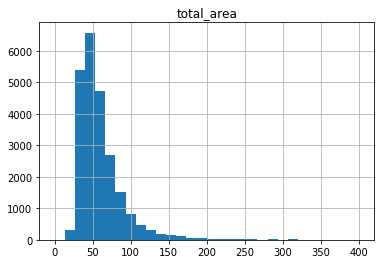

In [41]:
data.hist('total_area', bins=30, range= (0, 400))
data['total_area'].describe()

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Не забывай подписывать оси на графиках и сам график, иначе не залазя в код абсолютно не понятно, что изображено

Заметно что основная масса квартир площадью ~ 50 квм растёт к этому показателю, далее стремительно падает

In [42]:
data = data.query('total_area <= 250')

count    23483.000000
mean         2.051825
std          1.029584
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: rooms, dtype: float64

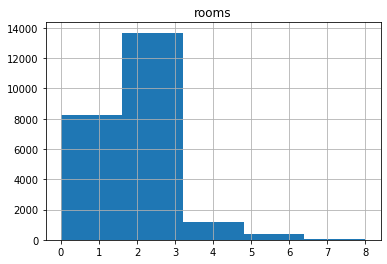

In [43]:
data.hist('rooms', bins=5, range=(0, 8 ) )
data['rooms'].describe()

Больше всего было продано  2х 3х комнатных квартир

In [44]:
 data = data.query('rooms <= 7')

Отсечем редкие продажи квартир свыше 7 комнат, их очень мало на общий результат это никак не повлияет

count    23468.000000
mean         2.705912
std          0.226923
min          2.500000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.800000
Name: ceiling_height, dtype: float64

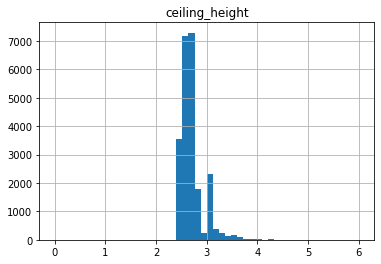

In [45]:
data.hist('ceiling_height', bins=50, range=(0, 6)  )
data['ceiling_height'].describe()

In [46]:
data =  data.query('ceiling_height <= 4')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d16f414d0>]],
      dtype=object)

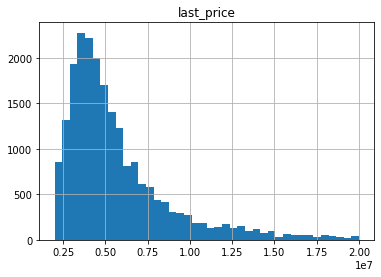

In [47]:
data.hist('last_price', bins=40, range=(2000000, 20000000 ) )

Среднее время продажи квартир 156.0
Медиана времени продажи квартир 73.0


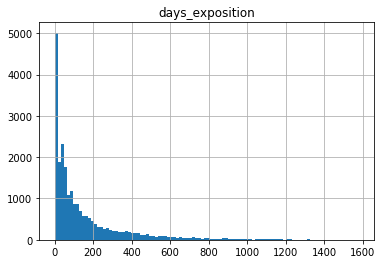

In [48]:
data.hist('days_exposition', bins=100)
sale_mean = data['days_exposition'].mean().round()
sale_median = data['days_exposition'].median().round()

print ('Среднее время продажи квартир', sale_mean )
print ('Медиана времени продажи квартир', sale_median )

Исходя из данных медиана сильно отличается от среднего, полагаясь на это можно сказать что есть случаи когда продажа длилась особенно долго! на гистограмме видно что были случаи когда жилье продовалось > 1200 дней

Так же есть случаи очень быстро продажи за несколько дней, похоже на мошеннические действия, таким образом было принято решение отсечь датафрейм по продаже (5-600) дней

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Всё абсолютно верно, радует,что пишешь такие подробные и всепокрывающие выводы

In [49]:
data = data.query(' 5 < days_exposition < 600')

отсечем все продажи свыше 600 дней (слишком долгий период, еденичные продажи) а так же до 5 дней, так как большой пик! владельцы могли снимать объявления и выкладывать заново, чтоб поднять объявление наверх

In [50]:
data = data[data['ceiling_height']  < 6]

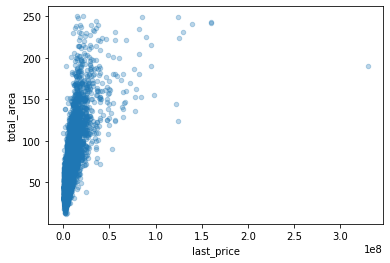

In [51]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3)


Заметно что с увелечнием площади, цена квартиры увеличивается

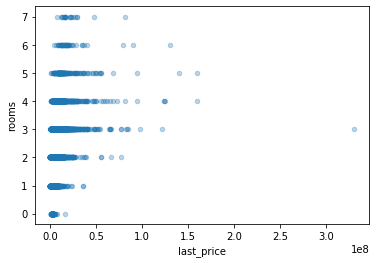

In [52]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)


Цены на квартиры растут в зависимости от кол-ва комнат (до 4 )  далее цена уменьшается, это скорее всего связано с тем что в Петербурге много бывших коммунальных квартир переведенных в обычные  

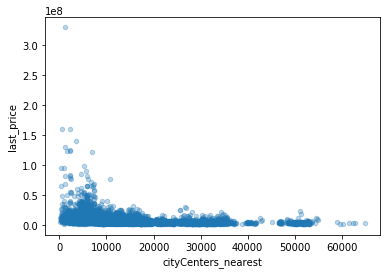

In [53]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)



На мой взгляд удаленность от центра не сильно влияет на стоимость жилья

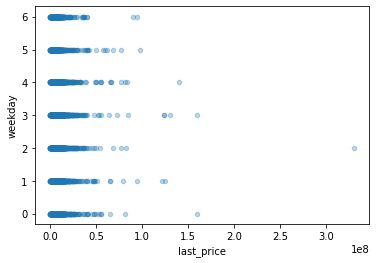

In [54]:
data.plot(x='last_price', y='weekday', kind='scatter', alpha=0.3)


Явной зависимости дня сделки и цены не наблюдается, только в воскресенье более лешевые сделки 

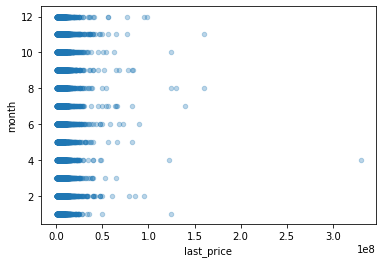

In [55]:
data.plot(x='last_price', y='month', kind='scatter', alpha=0.3)


Сделки с более дорогим жильем своершаются в июне и ноябре. Июнь многие получают квартальные и полугодовые премии, ноябрь - предновогодние скидки, и так же люди старабтся закрыть сделку в уходящем году

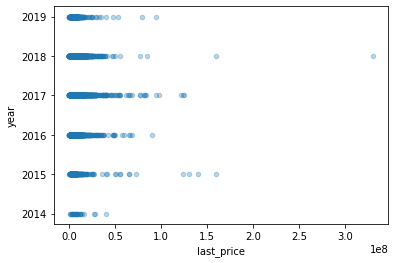

In [56]:
data.plot(x='last_price', y='year', kind='scatter', alpha=0.3)


Цены на квартиры до 2017 года росли, далее наблюдается спад в цене! это можно увязать с ценой курса доллара

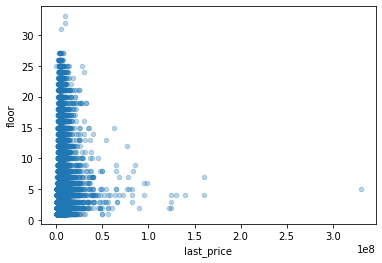

In [57]:
data.plot(x='last_price', y='floor', kind='scatter', alpha=0.3)


Зависимости этажа и цены не наблюдается

In [60]:
sale = data.pivot_table(index='locality_name', values='sqmprice', aggfunc=['mean', 'count'])

In [61]:
sale.columns = ('sqmprice', 'count')

In [63]:
sale['sqmprice'] = sale['sqmprice'].round()
sale.sort_values(by='count', ascending=False).head(10)

,sqmprice,count
locality_name,,
Санкт-Петербург,110959.0,12303
посёлок Мурино,85879.0,480
посёлок Шушары,78025.0,387
Всеволожск,68706.0,310
Колпино,74581.0,287
посёлок Парголово,89259.0,284
Пушкин,101278.0,273
деревня Кудрово,92571.0,269
Гатчина,68110.0,241


Среди 10 городов с наибольшим числом сделок, можно выделить СПб где средняя цена за квм жилья выше всего, замыкает рейтинг Выборг там самое доступное жилье в пересчете на квм

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Верно

In [68]:
spb = data.query('locality_name == "Санкт-Петербург"')

In [69]:
spb.dropna(subset=['cityCenters_nearest'], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,sqmprice,weekday,year,month,floor_name,livingtotal,kitchentotal
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,2,574.0,558.0,92786.0,3,2015,8,Другое,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.0,9,False,...,3,234.0,424.0,408176.0,4,2015,7,Другое,0.597484,0.103774
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.0,1,2018,6,Другое,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0,NaN,289.0,88525.0,6,2017,2,Другое,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2,553.0,137.0,127525.0,3,2017,11,Другое,0.512626,0.214646


In [71]:
spb['km'] = spb['cityCenters_nearest'] /1000
spb['km'] = spb['km'].round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sqmprice,weekday,year,month,floor_name,livingtotal,kitchentotal,km
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,574.0,558.0,92786.0,3,2015,8,Другое,0.612500,0.148214,14.0
3,0,64900000,159.0,2015-07-24,3,2.60,14,95.0,9,False,...,234.0,424.0,408176.0,4,2015,7,Другое,0.597484,0.103774,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121.0,100000.0,1,2018,6,Другое,0.320000,0.410000,8.0
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289.0,88525.0,6,2017,2,Другое,0.714754,0.106557,15.0
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,553.0,137.0,127525.0,3,2017,11,Другое,0.512626,0.214646,14.0


In [73]:
spb1 = spb.pivot_table(index = 'km', values='last_price')

In [74]:
spb1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30 entries, 0.0 to 29.0
Data columns (total 1 columns):
last_price    30 non-null float64
dtypes: float64(1)
memory usage: 480.0 bytes


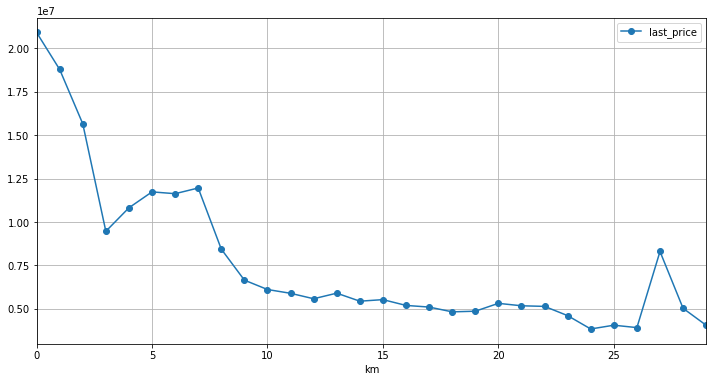

In [75]:
spb1.plot( style='o-', grid=True, figsize=(12, 6))

Судя по графику можно наблюдать что скачок начинается от 3 км, так что можно предположить что 3 км это граница центальной зоны Петербурга

In [76]:
spb_center = spb.query('km <= 3')

<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Центр определён верно, класс!

count    584.000000
mean      90.150873
std       42.271494
min       12.000000
25%       60.800000
50%       82.000000
75%      108.200000
max      248.700000
Name: total_area, dtype: float64

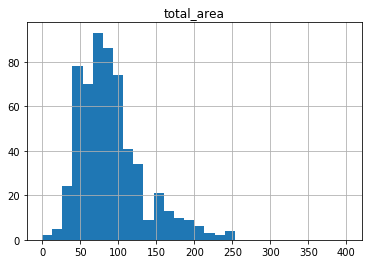

In [77]:
spb_center.hist('total_area', bins=30, range= (0, 400))
spb_center['total_area'].describe()

count    5.840000e+02
mean     1.395167e+07
std      2.151663e+07
min      2.385000e+06
25%      6.800000e+06
50%      9.000000e+06
75%      1.349925e+07
max      3.300000e+08
Name: last_price, dtype: float64

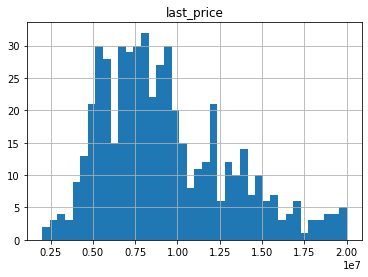

In [80]:
spb_center.hist('last_price', bins=40, range=(2000000, 20000000 ) )
spb_center['last_price'].describe()

count    584.000000
mean       2.952055
std        1.279645
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: rooms, dtype: float64

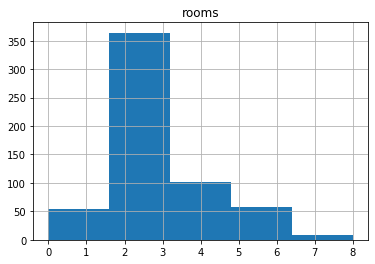

In [81]:
spb_center.hist('rooms', bins=5, range=(0, 8 ) )
spb_center['rooms'].describe()

count    584.000000
mean       3.038168
std        0.344694
min        2.500000
25%        2.800000
50%        3.000000
75%        3.260000
max        4.000000
Name: ceiling_height, dtype: float64

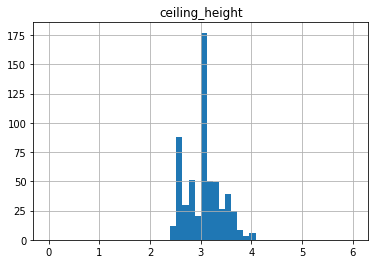

In [82]:
spb_center.hist('ceiling_height', bins=50, range=(0, 6)  )
spb_center['ceiling_height'].describe()

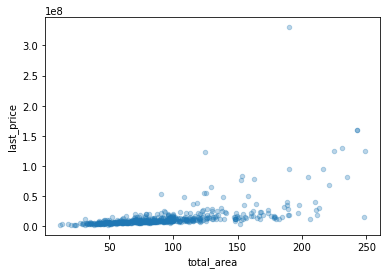

In [83]:
spb_center.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

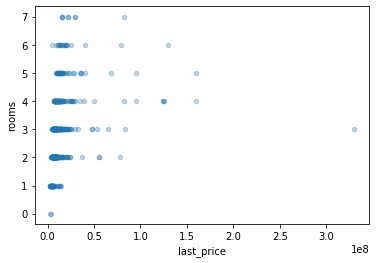

In [85]:
spb_center.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3)

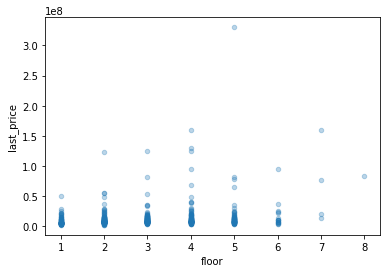

In [86]:
spb_center.plot(x='floor', y='last_price', kind='scatter', alpha=0.3)

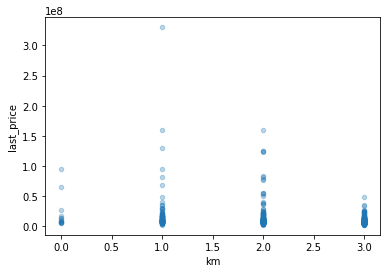

In [87]:
spb_center.plot(x='km', y='last_price', kind='scatter', alpha=0.3)

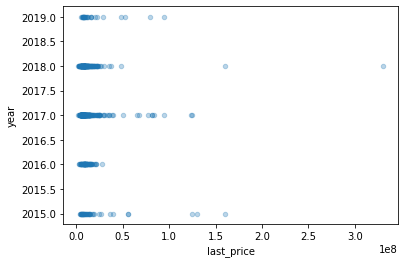

In [88]:
spb_center.plot(x='last_price', y='year', kind='scatter', alpha=0.3)

Высота потолков в центре выше чем в обшей выборке, концетрация квартир с площадью 70-100 квм в центре преобладает, а в общей выборке ~ 55 квм.  люди готовы платить за жилье  в центре выше чем в целом за его пределами. кол-во комнат продаваемых объектов в центре и по региону не отличается. Цена в центре не имеет отличий в зависимости от числа комнат, этажа,  даты размещения объявления! а удаленность от центра в (центральном районе ) не наблюдается, в отличии от всей выборки 


<div style="border:solid  green  2px; padding: 20px"> <h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

У тебя отлично получается анализировать сложные данные и находить скрытые зависимости, здорово!)

### Шаг 5. Общий вывод

Основная доля продаж приходится на 2х 3х комнатные квартиры, стоимостью в пределах 5000000, цена росла до 2017 года, далее плавно снижалась! В центре нет зависимости удаленности от него и стоимости квартиры. Пики продаж приходятся на ноябрь и июнь месяц (связано с полугодовыми премиями и квартальными) а так же желаением людей закрыть сделку в уходящем году. в центре квартиры приобладают с более высокими потолками и малоэтажностью  (старые дома) а целом по выборке наоборот более высокие дома и стандартрые потолки 2.8

Центр ограничивается 3 км. На стоимость квартир центре влияет площадь и более высокая стоимость за квм, более дорогие квартиры расположены на 2ом км

<div style="border:solid orange 2px; padding: 20px"> <h1 style="color:orange; margin-bottom:20px">Комментарий наставника</h1>

Общий вывод в будущем стоит писать подробнее, а так же приводить больше цифр полученных в ходе выполнения проекта

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

#### Код

Всё отлично. Из того, что очень порадовало - соблюдена структура проекта, шаги из задания обозначены и выполнены последовательно, код написан аккуратно, используются комментарии к коду, быстро можно понять, какие операции выполняют сложные конструкции. В качестве совета предлагаю глубже изучить библиотеку Seaborn для построения более ярких и качественных визуализаций в Python, так как иногда хорошая красочная визуализация может сказать очень многое о данных.

#### Выводы

Ты пишешь отличные обоснованные выводы по проделанной раблоте и выдвигаешь корректные гипотезы - это очень радует!) Так же видно глубокое понимание проведённого анализа. Было очень интересно проверять твой проект и следить за твоей мыслью, продолжай в том же духе) Удачи!)

<div style="border:solid  green  2px; padding: 20px">

<h1 style="color: green ; margin-bottom:20px">Комментарий наставника</h1>

Работа принята!) Удачи на следующих этапах, у тебя всё получится, только не сомневайся в себе и старательно подходи ко всем вопросам)